# Assignment 3

Team:

- Bertan Karacora

Tasks:

- For your experiments, use at least one augmentation from each of the following types:
    - Spatial Augmentations (rotation, mirroring, croppoing, ...)
    - Use some other augmentations (color jitter, gaussian noise, ...).
    - Use one (or more) of the following advanced augmentations:
    - **CutMix**: https://arxiv.org/pdf/1905.04899.pdf
    - **Mixup**: https://arxiv.org/pdf/1710.09412.pdf

- **Experiments 1:** Using your aforementioned augmentions:
    - Fine-tune ResNet, MobileNet, and ConvNext for your augmented dataset for car type classification and compare them.
    - Compare the following on a model of your choice: Fine-Tuned model, model as fixed feature extractor, and model with a Combined Approach
    - Log your losses and accuracies into Tensorboard (or some other logging tool)
    - **Extra Point**:
        - Fine-tune a Transformer-based model (e.g. SwinTransformer). Compare the performance (accuracy, confusion matrix, training time, loss landscape, ...) with the one from the convolutional models.
   
- **Experiment 2:** Try to get the best performance possible on this dataset
    - Fine-tune a pretrained neural network of your choice for classification.
    - Select a good training recipe: augmentations, optimizer, learning rate scheduling, classifier, loss function, ...

## Contents

- [x] [Setup](#setup)
    - [x] [Config](#setup_config)
    - [x] [Modules](#setup_modules)
    - [x] [Paths and names](#setup_paths_and_names)
- [x] [Data augmentation](#data_augmentation)
    - [x] [Visualization](#data_augmentation_visualization)
    - [x] [Discussion](#data_augmentation_discussion)
- [x] [Comparison of fine-tuned models](#comparison_of_fine_tuned_models)
    - [x] [ResNet](#comparison_of_fine_tuned_models_resnet)
    - [x] [MobileNet](#comparison_of_fine_tuned_models_mobilenet)
    - [x] [ConvNext](#comparison_of_fine_tuned_models_convnext)
    - [x] [Discussion](#comparison_of_fine_tuned_models_discussion)
- [x] [Comparison of transfer learning approaches](#comparison_of_transfer_learning_approaches)
    - [x] [Fixed feature extraction](#comparison_of_transfer_learning_approaches_fixed_feature_extraction)
    - [x] [Fine-tuning](#comparison_of_transfer_learning_approaches_fine_tuning)
    - [x] [Combined approach](#comparison_of_transfer_learning_approaches_combined_approach)
    - [x] [Discussion](#comparison_of_transfer_learning_approaches_discussion)
- [x] [Tensorboard](#tensorboard)
    - [x] [Visualization](#tensorboard_visualization)
    - [x] [Discussion](#tensorboard_discussion)
- [ ] [Fine-tuning a transformer-based model](#fine_tuning_a_transformer_based_model)
    - [ ] [Training and evaluation](#fine_tuning_a_transformer_based_model_training_and_evaluation)
    - [ ] [Discussion](#fine_tuning_a_transformer_based_model_discussion)
- [ ] [Car type classification](#car_type_classification)
    - [ ] [Training and evaluation](#car_type_classification_training_and_evaluation)
    - [ ] [Discussion](#car_type_classification_discussion)

## Setup
<a id="setup"></a>

### Config
<a id="setup_config"></a>

In [1]:
import assignment.config as config

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/config.yaml


In [2]:
config.list_available()

['stanfordcars_convnext',
 'stanfordcars_mobilenet',
 'stanfordcars_mobilenet_combined',
 'stanfordcars_mobilenet_fixed',
 'stanfordcars_resnet',
 'svhn_cnn',
 'svhn_cnn_l1',
 'svhn_cnn_l2',
 'svhn_mlp']

### Modules
<a id="setup_modules"></a>

In [3]:
from pathlib import Path

import assignment.scripts.init_exp as init_exp
from assignment.evaluation.evaluator import Evaluator
from assignment.training.trainer import Trainer
import assignment.libs.utils_checkpoints as utils_checkpoints
import assignment.libs.utils_data as utils_data
import assignment.visualization.plot as plot
import assignment.visualization.visualize as visualize

### Paths and names
<a id="setup_paths_and_names"></a>

In [4]:
name_exp_resnet = "stanfordcars_resnet"
name_exp_mobilenet = "stanfordcars_mobilenet"
name_exp_convnext = "stanfordcars_convnext"
name_exp_mobilenet_fixed = "stanfordcars_mobilenet_fixed"
name_exp_mobilenet_combined = "stanfordcars_mobilenet_combined"


path_dir_exp_resnet = Path(config._PATH_DIR_EXPS) / name_exp_resnet
path_dir_exp_mobilenet = Path(config._PATH_DIR_EXPS) / name_exp_mobilenet
path_dir_exp_convnext = Path(config._PATH_DIR_EXPS) / name_exp_convnext
path_dir_exp_mobilenet_fixed = Path(config._PATH_DIR_EXPS) / name_exp_mobilenet_fixed
path_dir_exp_mobilenet_combined = Path(config._PATH_DIR_EXPS) / name_exp_mobilenet_combined

## Data augmentation
<a id="data_augmentation"></a>

### Visualization
<a id="data_augmentation_visualization"></a>

In [17]:
init_exp.init_exp(name_exp=name_exp_resnet, name_config=name_exp_resnet)
config.set_config_exp(path_dir_exp_resnet)

Initializing experiment stanfordcars_resnet...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_resnet.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/config.yaml
Initializing experiment stanfordcars_resnet finished
Config loaded from /home/user/karacora/la

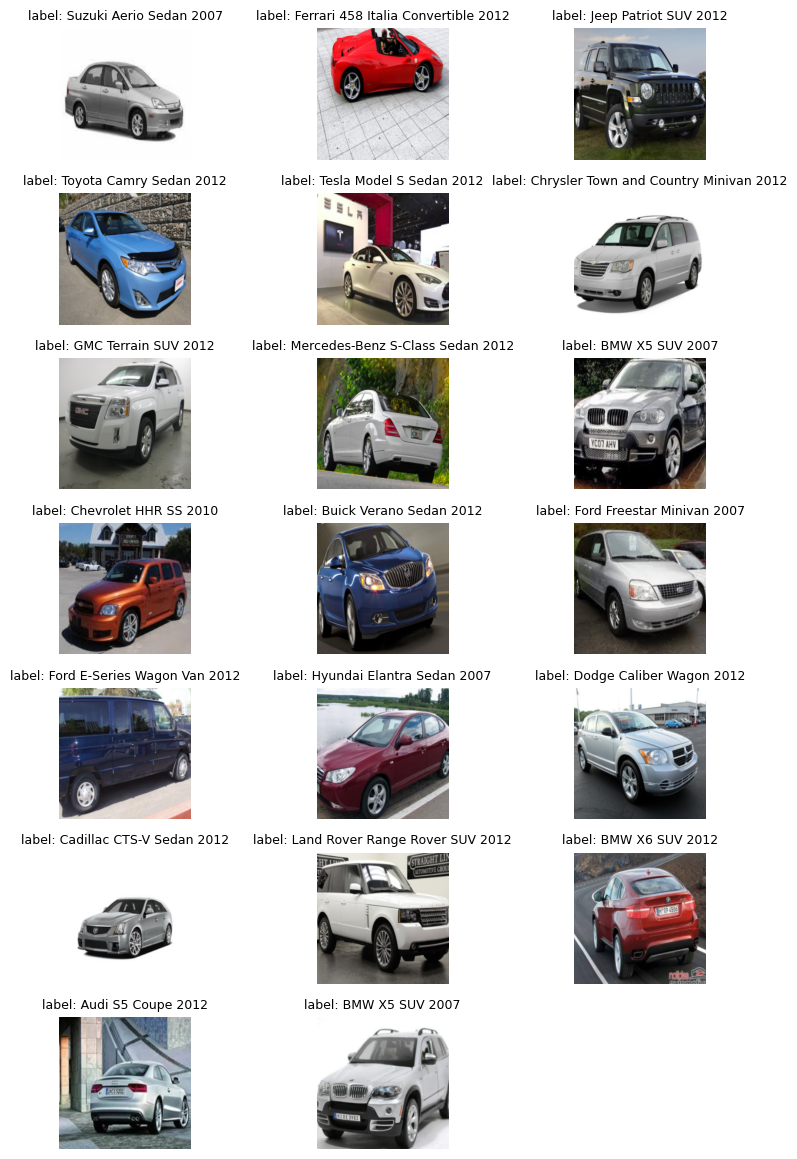

In [18]:
dataset_test, dataloader_test = utils_data.create_dataset_and_dataloader(split="test")
images, labels = utils_data.sample(dataloader_test, num_samples=20, unnormalize=True)

visualize.visualize_images(images, labels=dataset_test.labelset[labels])

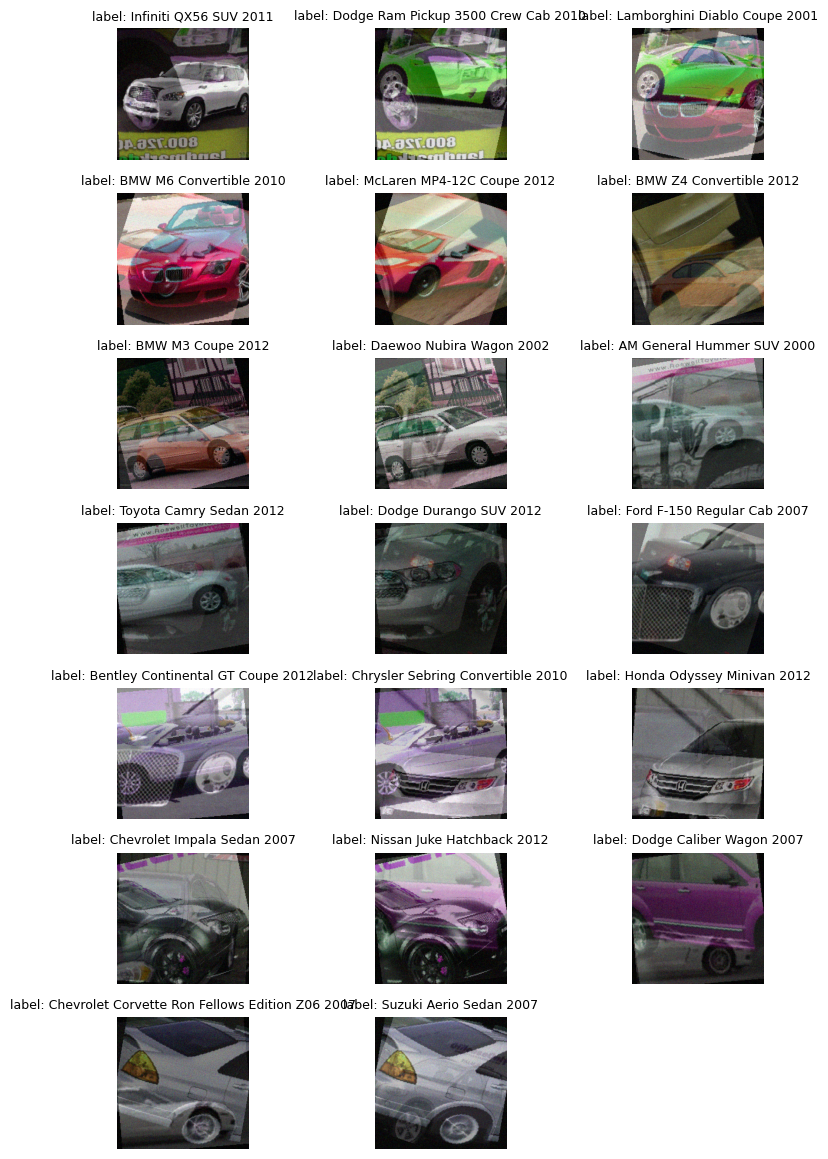

In [19]:
dataset_train, dataloader_train = utils_data.create_dataset_and_dataloader(split="train")
images, labels = utils_data.sample(dataloader_train, num_samples=20, unnormalize=True)

visualize.visualize_images(images, labels=dataset_train.labelset[labels.argmax(axis=1)])

### Discussion
<a id="data_augmentation_discussion"></a>

> Besides data type conversion and normalization, the following augmentations are applied in all experiments:
>
> - Random cropping (and then resizing the resulting patch).
> - Random horizontal flip with probability $p=0.5$. Vertical flip would not be sensible.
> - Random rotation by a degree $d \sim [-20, 20]$. This seems like a realistic and efficient way to augment images.
> - Brightness jitter by a factor $f \sim [0.6, 1.4]$. Brightness would be a factor with high variability in real world photographs (e.g., depending on daytime).
> - Contrast jitter by a factor $f \sim [0.8, 1.2]$.
> - Saturation jitter by a factor $f \sim [0.9, 1.1]$.
> - Hue jitter by a factor $f \sim [-0.2, 0.2]$. Colors of cars are pretty much arbitrary so it makes sense to use this augmentation.
> - Gaussian noise with mean $0.0$ and standard deviation $0.05$. Since this actually affects the intensity ranges, they are clipped back to the interval $[0.0, 1.0]$ afterards. This is done in another transform.
> - MixUp with interpolating value according to beta distribution where $\alpha=\beta=1.0$.
>
> Some transforms that are not available in Torchvision have been implemented in `assignment/transforms/`.
> The config file of each experiment is used to define these parameters.
> CutMix has been tested, but MixUp seems to fulfill the same purpose in a smoother way by interpolating instead of doing unrealistic cuts.

## Comparison of fine-tuned models
<a id="comparison_of_fine_tuned_models"></a>

### ResNet
<a id="comparison_of_fine_tuned_models_resnet"></a>

In [20]:
init_exp.init_exp(name_exp=name_exp_resnet, name_config=name_exp_resnet)
config.set_config_exp(path_dir_exp_resnet)

Initializing experiment stanfordcars_resnet...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_resnet.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/config.yaml
Initializing experiment stanfordcars_resnet finished
Config loaded from /home/user/karacora/la

Setting up dataloaders...
Train dataset
Dataset StanfordCars
    Number of datapoints: 6515
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: train
    Transform: Compose(
      PILToTensor()
      RandomResizedCrop(size=[224, 224], scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomHorizontalFlip(p=0.5)
      RandomRotation(degrees=[-20.0, 20.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      ColorJitter(brightness=(0.5, 1.5), contrast=(0.8, 1.2), saturation=(0.9, 1.1), hue=(-0.2, 0.2))
      GaussianNoise(mean=0.0, std=0.05)
      Clip(min=0.0, max=1.0)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Validate dataset
Dataset StanfordCars
    Number of datapoints: 1629
    Path: /home

Validating: Epoch 000 | Batch 025 | Loss 5.31254: 100%|██████████| 26/26 [00:02<00:00, 10.18it/s]
Training: Epoch 001 | Batch 100 | Loss 5.04911: 100%|██████████| 102/102 [00:20<00:00,  4.89it/s]
Validating: Epoch 001 | Batch 025 | Loss 4.67823: 100%|██████████| 26/26 [00:02<00:00, 10.32it/s]
Training: Epoch 002 | Batch 100 | Loss 4.92261: 100%|██████████| 102/102 [00:20<00:00,  4.95it/s]
Validating: Epoch 002 | Batch 025 | Loss 3.81517: 100%|██████████| 26/26 [00:02<00:00, 10.27it/s]
Training: Epoch 003 | Batch 100 | Loss 4.75318: 100%|██████████| 102/102 [00:20<00:00,  4.91it/s]
Validating: Epoch 003 | Batch 025 | Loss 3.80418: 100%|██████████| 26/26 [00:02<00:00, 10.18it/s]
Training: Epoch 004 | Batch 100 | Loss 4.45936: 100%|██████████| 102/102 [00:20<00:00,  4.89it/s]
Validating: Epoch 004 | Batch 025 | Loss 4.16500: 100%|██████████| 26/26 [00:02<00:00, 10.28it/s]
Training: Epoch 005 | Batch 100 | Loss 4.41350: 100%|██████████| 102/102 [00:20<00:00,  4.97it/s]
Validating: Epoch 00

Looping finished


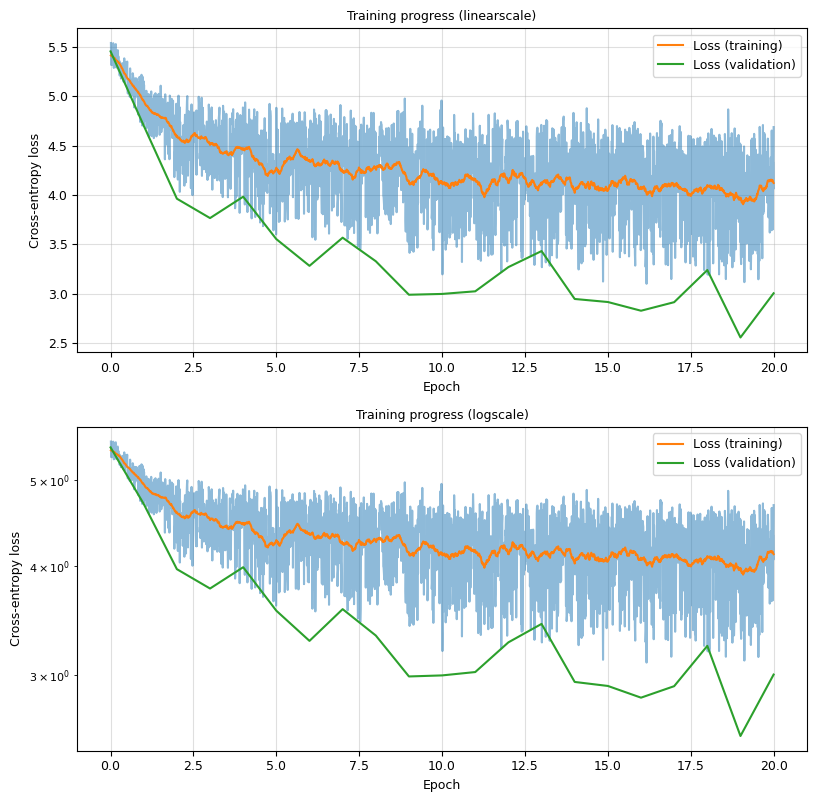

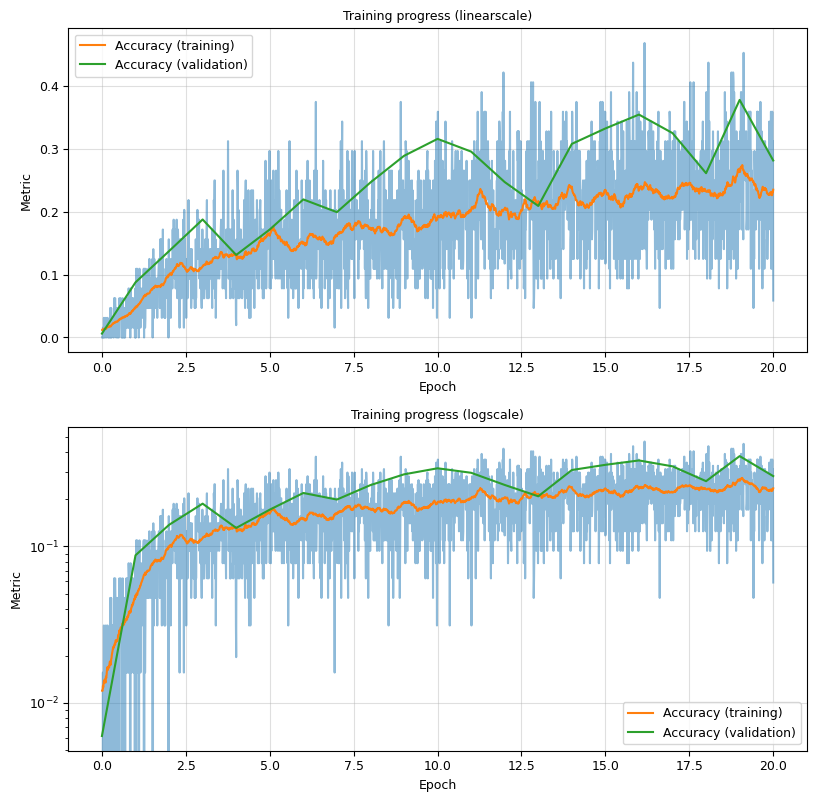

In [21]:
trainer = Trainer(name_exp_resnet)
trainer.loop(config.TRAINING["num_epochs"])
log_resnet = trainer.log

plot.plot_loss(log_resnet)
plot.plot_metrics(log_resnet)

In [10]:
_, model_resnet, _, _ = utils_checkpoints.load(path_dir_exp_resnet / "checkpoints" / "final.pth")

evaluator_resnet = Evaluator(name_exp_resnet, model_resnet)
evaluator_resnet.evaluate()

print(f"Loss on test data: {evaluator_resnet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_resnet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

Setting up dataloader...
Test dataset
Dataset StanfordCars
    Number of datapoints: 8041
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: test
    Transform: Compose(
      PILToTensor()
      Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=[224, 224])
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Setting up dataloader finished
Setting up criterion...
Setting up criterion finished
Setting up measurers...
Setting up measurers finished


Validating: Batch 125 | Loss 3.48091: 100%|██████████| 126/126 [00:12<00:00, 10.43it/s]

Loss on test data: 3.328348951365814
Metrics on test data
    Accuracy  : 0.2393980848153215


### MobileNet
<a id="comparison_of_fine_tuned_models_mobilenet"></a>

In [22]:
init_exp.init_exp(name_exp=name_exp_mobilenet, name_config=name_exp_mobilenet)
config.set_config_exp(path_dir_exp_mobilenet)

Initializing experiment stanfordcars_mobilenet...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_mobilenet.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/config.yaml
Initializing experiment stanfordcars_mobilenet finished
Config loaded 

Setting up dataloaders...
Train dataset
Dataset StanfordCars
    Number of datapoints: 6515
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: train
    Transform: Compose(
      PILToTensor()
      RandomResizedCrop(size=[224, 224], scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomHorizontalFlip(p=0.5)
      RandomRotation(degrees=[-20.0, 20.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      ColorJitter(brightness=(0.5, 1.5), contrast=(0.8, 1.2), saturation=(0.9, 1.1), hue=(-0.2, 0.2))
      GaussianNoise(mean=0.0, std=0.05)
      Clip(min=0.0, max=1.0)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Validate dataset
Dataset StanfordCars
    Number of datapoints: 1629
    Path: /home

Validating: Epoch 000 | Batch 025 | Loss 5.29458: 100%|██████████| 26/26 [00:02<00:00, 10.19it/s]
Training: Epoch 001 | Batch 100 | Loss 5.19118: 100%|██████████| 102/102 [00:20<00:00,  4.89it/s]
Validating: Epoch 001 | Batch 025 | Loss 5.22043: 100%|██████████| 26/26 [00:02<00:00, 10.16it/s]
Training: Epoch 002 | Batch 100 | Loss 4.95780: 100%|██████████| 102/102 [00:21<00:00,  4.83it/s]
Validating: Epoch 002 | Batch 025 | Loss 5.28409: 100%|██████████| 26/26 [00:02<00:00, 10.14it/s]
Training: Epoch 003 | Batch 100 | Loss 4.49110: 100%|██████████| 102/102 [00:20<00:00,  4.89it/s]
Validating: Epoch 003 | Batch 025 | Loss 5.28323: 100%|██████████| 26/26 [00:02<00:00, 10.12it/s]
Training: Epoch 004 | Batch 100 | Loss 4.98590: 100%|██████████| 102/102 [00:20<00:00,  4.89it/s]
Validating: Epoch 004 | Batch 025 | Loss 5.28286: 100%|██████████| 26/26 [00:02<00:00, 10.04it/s]
Training: Epoch 005 | Batch 100 | Loss 4.86747: 100%|██████████| 102/102 [00:21<00:00,  4.80it/s]
Validating: Epoch 00

Looping finished


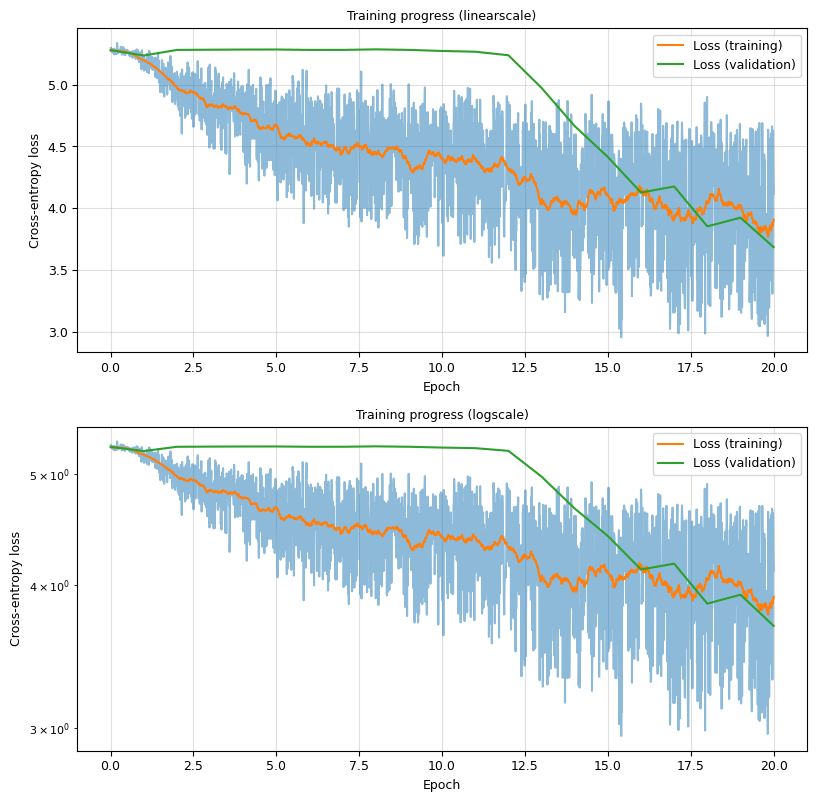

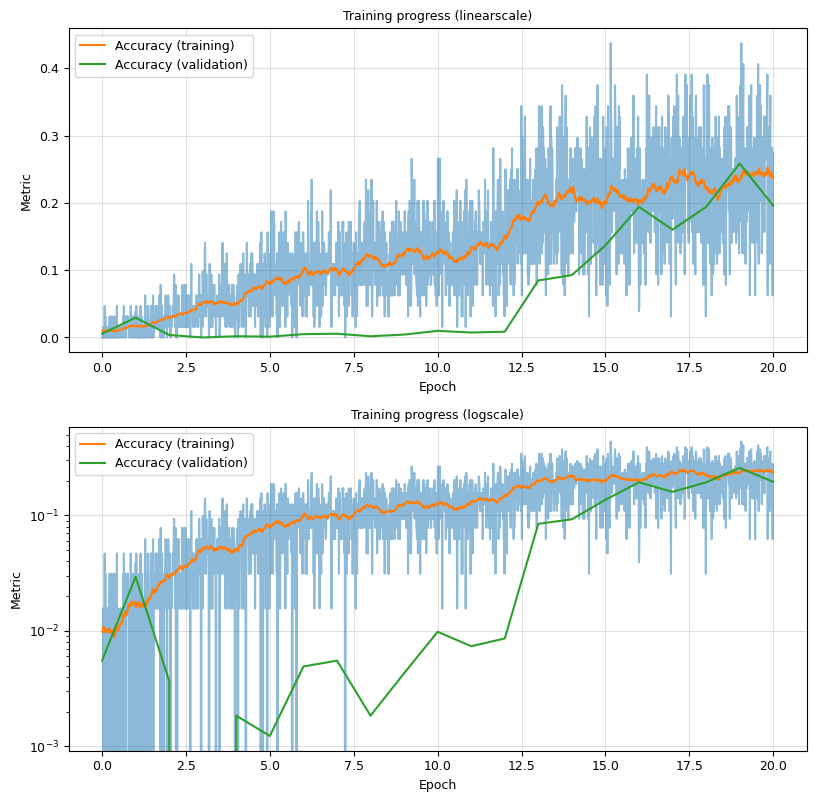

In [23]:
trainer = Trainer(name_exp_mobilenet)
trainer.loop(config.TRAINING["num_epochs"])
log_mobilenet = trainer.log

plot.plot_loss(log_mobilenet)
plot.plot_metrics(log_mobilenet)

In [24]:
_, model_mobilenet, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet, model_mobilenet)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

Setting up dataloader...
Test dataset
Dataset StanfordCars
    Number of datapoints: 8041
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: test
    Transform: Compose(
      PILToTensor()
      Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=[224, 224])
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Setting up dataloader finished
Setting up criterion...
Setting up criterion finished
Setting up measurers...
Setting up measurers finished


Validating: Batch 125 | Loss 3.94788: 100%|██████████| 126/126 [00:12<00:00, 10.49it/s]

Loss on test data: 3.7699863508319607
Metrics on test data
    Accuracy  : 0.17025245616216889


### ConvNext
<a id="comparison_of_fine_tuned_models_convnext"></a>

In [6]:
init_exp.init_exp(name_exp=name_exp_convnext, name_config=name_exp_convnext)
config.set_config_exp(path_dir_exp_convnext)

Initializing experiment stanfordcars_convnext...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_convnext
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_convnext/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_convnext/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_convnext/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_convnext/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_convnext.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_convnext/config.yaml
Initializing experiment stanfordcars_convnext finished
Config loaded from /hom

Setting up dataloaders...
Train dataset
Dataset StanfordCars
    Number of datapoints: 6515
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: train
    Transform: Compose(
      PILToTensor()
      RandomResizedCrop(size=[224, 224], scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomHorizontalFlip(p=0.5)
      RandomRotation(degrees=[-20.0, 20.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      ColorJitter(brightness=(0.5, 1.5), contrast=(0.8, 1.2), saturation=(0.9, 1.1), hue=(-0.2, 0.2))
      GaussianNoise(mean=0.0, std=0.05)
      Clip(min=0.0, max=1.0)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Validate dataset
Dataset StanfordCars
    Number of datapoints: 1629
    Path: /home

Validating: Epoch 000 | Batch 025 | Loss 5.31157: 100%|██████████| 26/26 [00:02<00:00,  9.97it/s]
Training: Epoch 001 | Batch 100 | Loss 5.18115: 100%|██████████| 102/102 [00:27<00:00,  3.78it/s]
Validating: Epoch 001 | Batch 025 | Loss 4.91679: 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]
Training: Epoch 002 | Batch 100 | Loss 4.91182: 100%|██████████| 102/102 [00:27<00:00,  3.75it/s]
Validating: Epoch 002 | Batch 025 | Loss 4.22052: 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]
Training: Epoch 003 | Batch 100 | Loss 4.32951: 100%|██████████| 102/102 [00:27<00:00,  3.72it/s]
Validating: Epoch 003 | Batch 025 | Loss 3.81622: 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]
Training: Epoch 004 | Batch 100 | Loss 4.64874: 100%|██████████| 102/102 [00:27<00:00,  3.72it/s]
Validating: Epoch 004 | Batch 025 | Loss 3.45758: 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]
Training: Epoch 005 | Batch 100 | Loss 4.20531: 100%|██████████| 102/102 [00:27<00:00,  3.70it/s]
Validating: Epoch 00

Looping finished


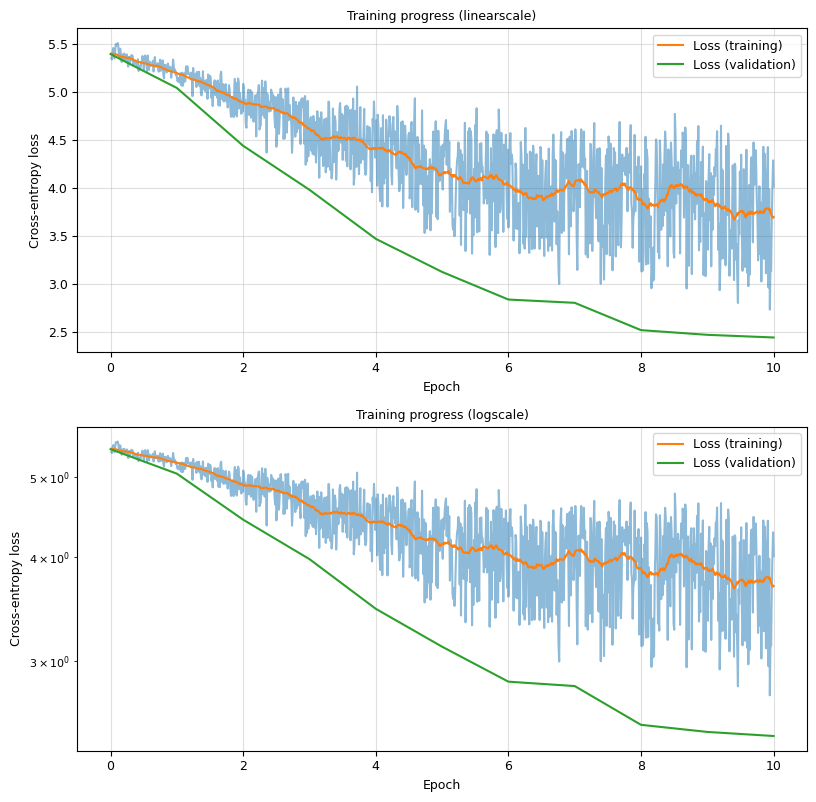

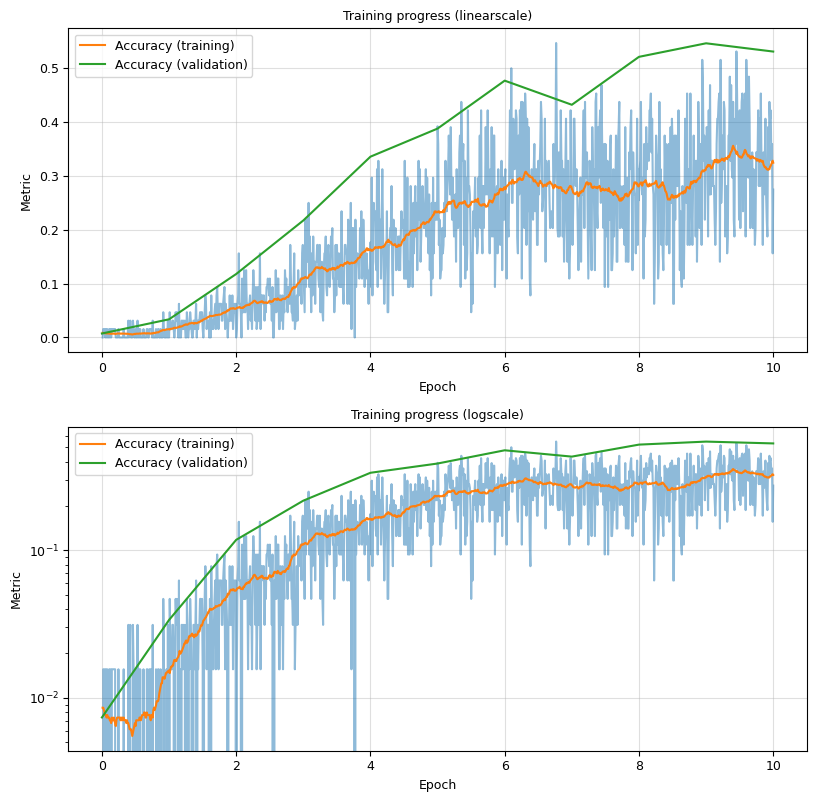

In [7]:
trainer = Trainer(name_exp_convnext)
trainer.loop(config.TRAINING["num_epochs"])
log_convnext = trainer.log

plot.plot_loss(log_convnext)
plot.plot_metrics(log_convnext)

In [9]:
_, model_convnext, _, _ = utils_checkpoints.load(path_dir_exp_convnext / "checkpoints" / "final.pth")

evaluator_convnext= Evaluator(name_exp_convnext, model_convnext)
evaluator_convnext.evaluate()

print(f"Loss on test data: {evaluator_convnext.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_convnext.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

Setting up dataloader...
Test dataset
Dataset StanfordCars
    Number of datapoints: 8041
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: test
    Transform: Compose(
      PILToTensor()
      Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=[224, 224])
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Setting up dataloader finished
Setting up criterion...
Setting up criterion finished
Setting up measurers...
Setting up measurers finished


Validating: Batch 125 | Loss 2.79889: 100%|██████████| 126/126 [00:12<00:00, 10.40it/s]

Loss on test data: 2.665117876518723
Metrics on test data
    Accuracy  : 0.453426190772292


### Discussion
<a id="comparison_of_fine_tuned_models_discussion"></a>

> Unfortunately, I am running out of time. Therefore, I was only able to run the training for a few epochs. I did have a lot of problems with these tasks. Some issues just cost me time, e.g., I was running out of CUDA memory as some other people used the GPU. In the end, I switched to another remote machine, but I did have to do my entire setup again. Also downloading the dataset did cost me some time, as it was not straight-forward to find a link to download it (the original one is still broken).
>
> Regarding the results of my experiments: For ResNet, the validation loss is actually mostly smaller the the train loss. This might be due to the augmentations which make it harder to identify the cars in the train set. The final accuracy is around $0.24$ which is rather low. In general, classifying almost $200$ different cars is the first time that the task is a little difficult. So a rather low value might be expectable. Combpared with the ImageNet dataset which the models have been trained on before fine-tuning, all of them reach much higher scores even with $1000$ classes in that dataset. The objects are easier to distinguish than car models (at least from a human perspective) but still, my results are suboptimal. One could definitely say, there is underfitting with  that low scores and the validation metrics exceeding the training metrics. Let me know, if you know what went wrong for me here.
>
> The MobileNet reaches a score of roughly $0.17$ which is worse. However, the MobileNet is also a much smaller model. Finally, the ConvNext reaches approx. $0.45$ which is by far the best. Even though it is only trained for 10 epochs. Once again, it is also the largest model (number of parameters is printed above).
>
> In the end, I noticed that the validation loss and accuracy stagnate for some epochs before going in the right direction (in case of the MobileNet experiment). Maybe this indicates a learning rate issue and what is observable there is the scheduler mitigating the problem at some point.

## Comparison of transfer learning approaches
<a id="comparison_of_transfer_learning_approaches"></a>

### Fixed feature extraction
<a id="comparison_of_transfer_learning_approaches_fixed_feature_extraction"></a>

In [10]:
init_exp.init_exp(name_exp=name_exp_mobilenet_fixed, name_config=name_exp_mobilenet_fixed)
config.set_config_exp(path_dir_exp_mobilenet_fixed)

Initializing experiment stanfordcars_mobilenet_fixed...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet_fixed
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet_fixed/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet_fixed/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet_fixed/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet_fixed/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_mobilenet_fixed.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet_fixed/config.yaml
Initializing experimen

In [ ]:
trainer = Trainer(name_exp_mobilenet_fixed)
trainer.loop(5)
log_mobilenet_fixed = trainer.log

plot.plot_loss(log_mobilenet_fixed)
plot.plot_metrics(log_mobilenet_fixed)

In [ ]:
_, model_mobilenet_fixed, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet_fixed / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet_fixed, model_mobilenet_fixed)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Fine-tuning
<a id="comparison_of_transfer_learning_approaches_fine_tuning"></a>

See [above](#comparison_of_fine_tuned_models_mobilenet).

### Combined approach
<a id="comparison_of_transfer_learning_approaches_combined_approach"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_mobilenet_combined, name_config=name_exp_mobilenet_combined)
config.set_config_exp(path_dir_exp_mobilenet_combined)

In [ ]:
trainer = Trainer(name_exp_mobilenet_combined)
trainer.loop(config.TRAINING["num_epochs"])
log_mobilenet_combined = trainer.log

plot.plot_loss(log_mobilenet_combined)
plot.plot_metrics(log_mobilenet_combined)

In [ ]:
_, model_mobilenet_combined, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet_combined / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet_combined, model_mobilenet_combined)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Discussion
<a id="comparison_of_transfer_learning_approaches_discussion"></a>

> 

## Tensorboard
<a id="tensorboard"></a>

### Visualization
<a id="tensorboard_visualization"></a>

![Screenshot of Tensorboard session](./experiments/screenshot_tensorboard.png)

### Discussion
<a id="tensorboard_discussion"></a>

> The graphs in this image are just from some random experiment run. So this is just for quick demonstration purposes. The tensorboard logs are saved to the respective experiment directory (`experiments/<NAME_EXP>/log/`). The tensorboard writer is used in `assignment/training/train.py`.

## Car type classification
<a id="car_type_classification"></a>

### Training and evaluation
<a id="car_type_classification_training_and_evaluation"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_mobilenet_combined, name_config=name_exp_mobilenet_combined)
config.set_config_exp(path_dir_exp_mobilenet_combined)

In [ ]:
trainer = Trainer(name_exp_mobilenet_combined)
trainer.loop(config.TRAINING["num_epochs"])
log_mobilenet_combined = trainer.log

plot.plot_loss(log_mobilenet_combined)
plot.plot_metrics(log_mobilenet_combined)

In [ ]:
_, model_mobilenet_combined, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet_combined / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet_combined, model_mobilenet_combined)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Discussion
<a id="car_type_classification_discussion"></a>

> Obviously, I had problems in the previous tasks. Therefore, my best accuracy on the used dataset is not worth mentioning and I don't know what the problem is :(